In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import seaborn as sns
from sklearn.datasets import make_regression

%matplotlib inline

In [48]:
x = np.linspace(0, 10, 300)

def func(x):
    return x*np.cos((x-9))

In [79]:
def get_derivative(func, x0=0, degree=1):
    '''Get the derivative at x0 of n-th degree'''
    x = np.linspace(x0-6, x0+6, 3000)
    dx = x[1]-x[0]
    y = func(x)
    for i in range(degree):
        y = np.gradient(y, dx)
    closest_to_0_x = min(x, key=lambda x: abs(x - x0))
    zero_index_in_x = np.where(x==closest_to_0_x)[0][0]
    return y[zero_index_in_x]

def get_slope(x, x0):
    '''Get a linear slope function at point x0'''
    b = get_derivative(func, x0=x0)
    a = func(x0) - get_derivative(func, x0=x0)*x0
    x = np.array(x)
    return a + x*b

def gradient_descent(func, start, step_size, stop=0.01):
    '''Get a list of values representing steps in 1-d gradient descent'''
    container = [start]
    while True:  
        step = get_derivative(func, start)*step_size
        if step < stop: # early stopping
            break
        start = start - step
        container.append(start)
    return np.array(container)

In [114]:
gradient_descent(func, 8, 0.1, 0.001)

array([8.        , 7.27226881, 6.57023373, 6.21802902, 6.09411202,
       6.05031056, 6.03434251, 6.02843816, 6.02624277])

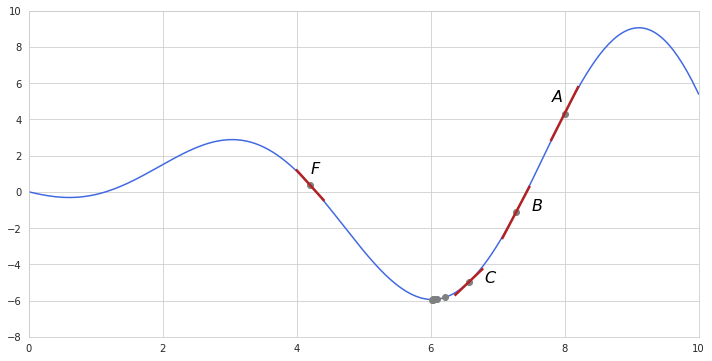

In [117]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12,6))

# function
ax.plot(x, func(x), color='royalblue')

gr_desc_points = gradient_descent(func, 8, 0.1, 0.001)
ax.scatter(gr_desc_points, func(gr_desc_points), color='grey', zorder=5)

# plot example of a slope at points
ax.plot([7.8, 8.2], get_slope([7.8, 8.2], 8), color='firebrick', linewidth=2.5, zorder=6)
ax.text(7.8, 5, '$A$', size=16)
ax.plot([7.072, 7.472], get_slope([7.072, 7.472], 7.272), color='firebrick', linewidth=2.5, zorder=6)
ax.text(7.5, -1, '$B$', size=16)
ax.plot([6.37, 6.77], get_slope([6.37, 6.77], 6.57), color='firebrick', linewidth=2.5, zorder=6)
ax.text(6.8, -5, '$C$', size=16)

ax.scatter([4.2], func(4.2), color='grey', zorder=5)
ax.plot([4, 4.4], get_slope([4, 4.4], 4.2), color='firebrick', linewidth=2.5, zorder=6)
ax.text(4.2, 1, '$F$', size=16)

ax.set_xlim(0, 10)
ax.set_ylim(-8, 10)
plt.savefig('../../assets/images/optimization/gradient_descent_example.png', bbox_inches='tight');

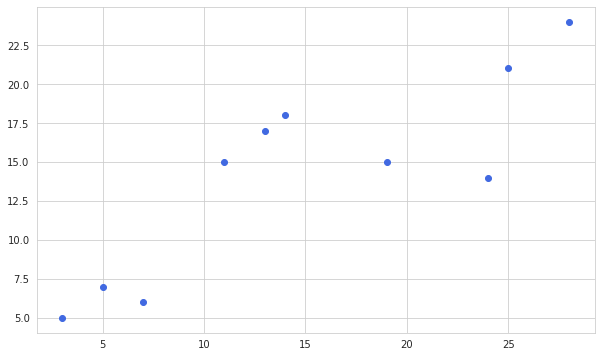

In [2]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
x = np.array([3, 5, 7, 11, 13, 14, 19, 24, 25, 28])
y = np.array([5, 7, 6, 15, 17, 18, 15, 14, 21, 24])
ax.scatter(x, y, color='royalblue')
plt.savefig('../../assets/images/regression/some_linear_distribution.png', bbox_inches='tight');

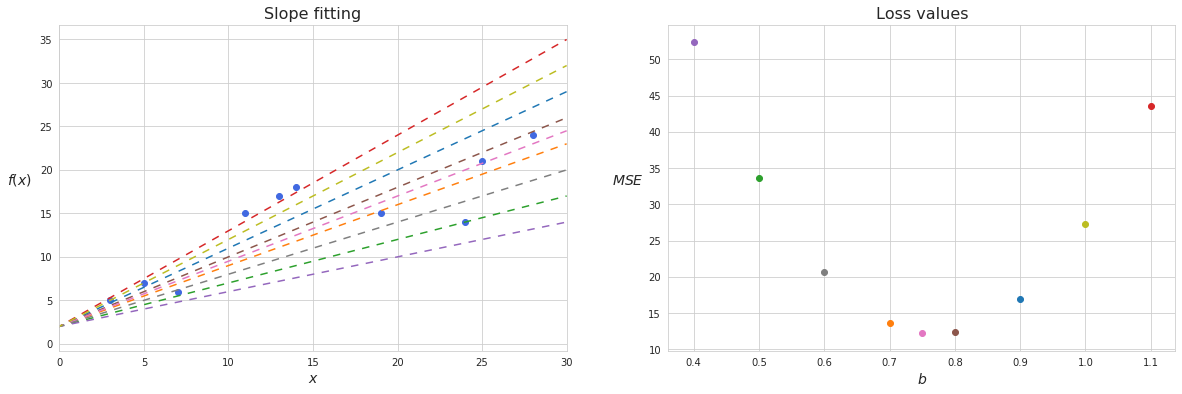

In [3]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
x = np.array([3, 5, 7, 11, 13, 14, 19, 24, 25, 28])
y = np.array([5, 7, 6, 15, 17, 18, 15, 14, 21, 24])
ax[0].scatter(x, y, color='royalblue')

a = 2
x_s = np.linspace(-1, 30, 600)

# guess 1
bs = [0.9, 0.7, 0.5, 1.1, 0.4, 0.8, 0.75, 0.6, 1]
for b in bs:
    y1 = a + x_s * b
    ax[0].plot(x_s, y1, linestyle='--', dashes=(5,5))

    y1_s = a + x * b
    p_1 = np.sum((y1_s - y)**2) / len(y)
    ax[1].scatter(b, p_1)

ax[0].set_xlim(0, 30)
ax[0].set_xlabel('$x$', fontsize=14)
ax[0].set_ylabel('$f(x)$', fontsize=14, rotation=0, labelpad=20)

ax[1].set_xlabel('$b$', fontsize=14)
ax[1].set_ylabel('$MSE$', fontsize=14, rotation=0, labelpad=20)

ax[0].set_title('Slope fitting', fontsize=16)
ax[1].set_title('Loss values', fontsize=16)
plt.savefig('../../assets/images/regression/loss_values_and_slope.png', bbox_inches='tight');

## Plot momentum gradient descent

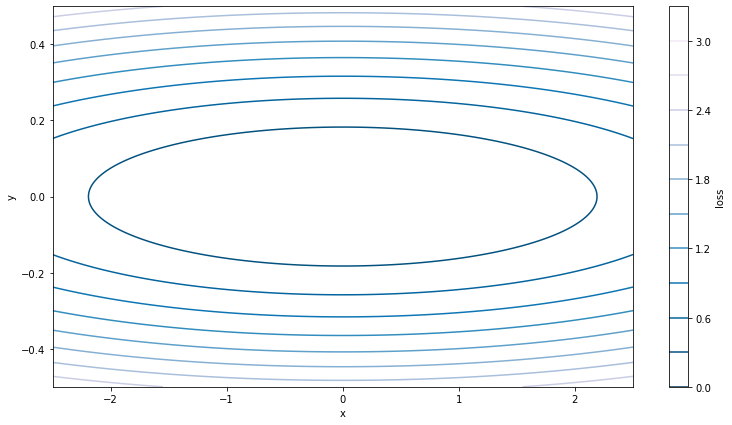

In [19]:
class LossSurface:
    """A loss surface with L(x, y) = a * x ^2 + b * y ^2.
    """
    def __init__(self, a, b):
        self.a = a
        self.b = b

        N = 1000
        x_list = np.linspace(-3.5, 3.5, N)
        y_list = np.linspace(-0.5, 0.5, N)
        self.X, self.Y = np.meshgrid(x_list, y_list)
        self.Z = self.a * (self.X ** 2) + self.b * (self.Y ** 2)

    def plot(self):
        fig, ax = plt.subplots(figsize=(13, 7))
        cmap = cm.get_cmap('PuBu_r')
        cp = ax.contour(self.X, self.Y, self.Z, 10, cmap=cmap)
        cbar = fig.colorbar(cp)
        cbar.set_label('Loss')

        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(-0.5, 0.5)

        ax.set_xlabel('x')
        ax.set_ylabel('y')

        return fig, ax


loss_surface = LossSurface(1/16, 9)
fig, ax = loss_surface.plot()

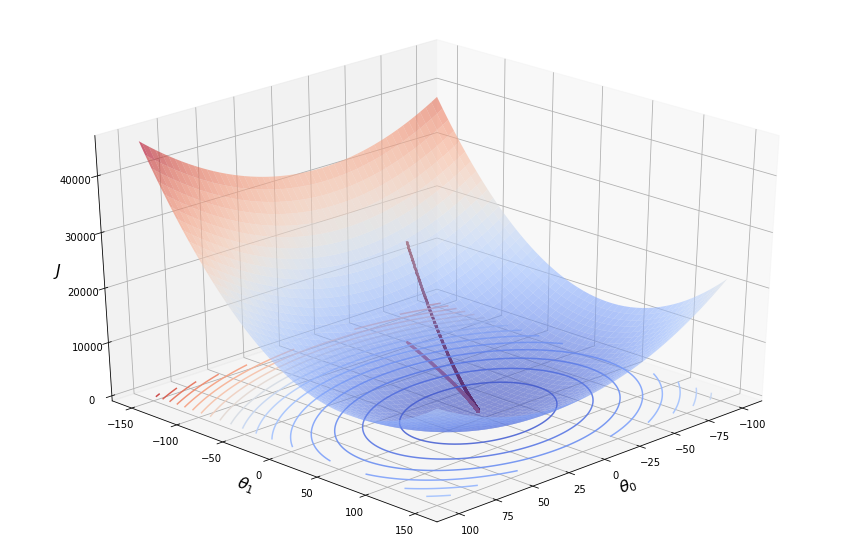

In [267]:
# Static plot
# Simulate data for univariate linear regression
X, y = make_regression(n_samples=100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=42)
X = X.flatten()
# Add ones to account for intercept in the model
X = np.vstack([np.ones(X.size), X]).T


def get_gradient(X, y, theta):
    # Vectorized version of the loss function and its gradient
    err = X @ theta - y
    J = (err.T @ err) / y.size
    gradient_J = 1/(2*y.size) * (X.T @ err)
    return (J, gradient_J)


def gradient_descend(X, y, theta, alpha=0.01, precision=0.001, maxsteps=1000):
    theta_hist = [theta]
    # Initial guess
    step = 0
    J, gradient_J = get_gradient(X, y, theta)
    loss_hist = [J]
    
    while J > precision and step <= maxsteps:
        step += 1
        theta = theta - alpha*gradient_J
        theta_hist.append(theta)
        J, gradient_J = get_gradient(X, y, theta)
        loss_hist.append(J)
    
    return (np.array(loss_hist), np.array(theta_hist))


# Initail value of theta
theta = np.array([-45, -100])
# Meshgrid of all possible theta values
T0, T1 = np.meshgrid(np.linspace(-100, 100, 100), 
                     np.linspace(-150, 150, 100))

# Cost function for each combination of theta values
zs = np.array([get_gradient(X, y, theta)[0]
               for theta in zip(np.ravel(T0), np.ravel(T1))])
# Put the array of cost function results into dimension of thetas
Z = zs.reshape(T0.shape)

J, gradient_J = gradient_descend(X, y, theta)

# Plot surfaces
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, Z, cmap='coolwarm', alpha=0.6)
ax.set_xlabel(r'$\theta_0$', fontsize=16)
ax.set_ylabel(r'$\theta_1$', fontsize=16)
ax.set_zlabel('$J$', fontsize=16)
ax.view_init(elev=30, azim=45)
ax.contour(T0, T1, Z, 20, cmap='coolwarm', alpha=0.9, offset=0)
# Plot descent
ax.plot(gradient_J.T[0], gradient_J.T[1], J, color='maroon', marker='.', markersize=3)
ax.plot(gradient_J.T[0], gradient_J.T[1], 0, color='indianred', marker='.', markersize=3);

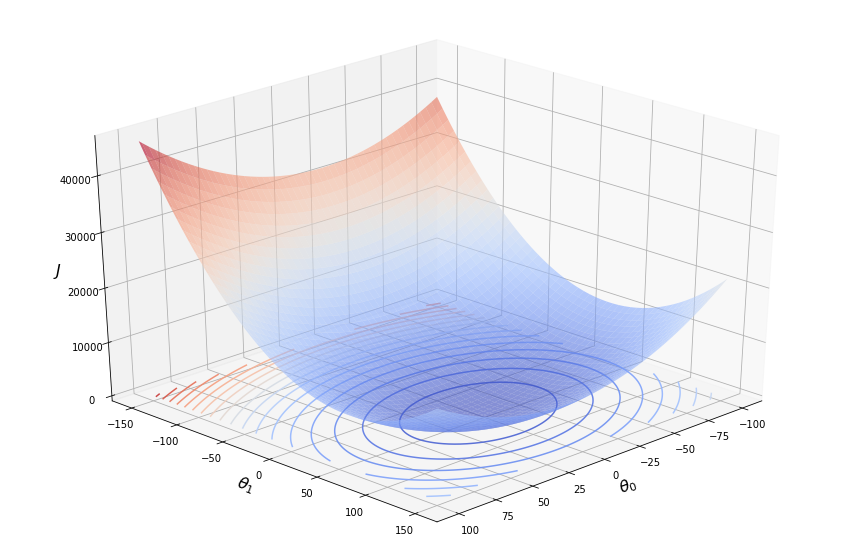

In [108]:
# Simulate data for univariate linear regression
X, y = make_regression(n_samples=100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=42)
X = X.flatten()
# Add ones to account for intercept in the model
X = np.vstack([np.ones(X.size), X]).T


def get_gradient(X, y, theta):
    # Vectorized version of the loss function and its gradient
    err = X @ theta - y
    J = (err.T @ err) / y.size
    gradient_J = 1/(2*y.size) * (X.T @ err)
    return (J, gradient_J)


def gradient_descend(X, y, theta, alpha=0.05, min_gain=1e-06, maxsteps=3000):
    theta_hist = [theta]
    # Initial guess
    step = 0
    gain = 999
    J, gradient_J = get_gradient(X, y, theta)
    loss_hist = [J]
    
    while gain > min_gain and step <= maxsteps:
        step += 1
        theta = theta - alpha*gradient_J
        theta_hist.append(theta)
        J, gradient_J = get_gradient(X, y, theta)
        gain = loss_hist[-1] - J
        loss_hist.append(J)
    return (np.array(loss_hist), np.array(theta_hist))


# Initail value of theta
theta = np.array([-45, -100])
# Meshgrid of all possible theta values
T0, T1 = np.meshgrid(np.linspace(-100, 100, 100), 
                     np.linspace(-150, 150, 100))

# Cost function for each combination of theta values
zs = np.array([get_gradient(X, y, theta)[0]
               for theta in zip(np.ravel(T0), np.ravel(T1))])
# Put the array of cost function results into dimension of thetas
Z = zs.reshape(T0.shape)

J, gradient_J = gradient_descend(X, y, theta)

# Plot surfaces
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, Z, cmap='coolwarm', alpha=0.6)
ax.set_xlabel(r'$\theta_0$', fontsize=16)
ax.set_ylabel(r'$\theta_1$', fontsize=16)
ax.set_zlabel('$J$', fontsize=16)
ax.view_init(elev=30, azim=45)
ax.contour(T0, T1, Z, 20, cmap='coolwarm', alpha=0.9, offset=0)

theta0s = gradient_J.T[0]
theta1s = gradient_J.T[1]

data = [np.array([theta0s, theta1s, J]),
        np.array([theta0s, theta1s, np.full(J.size, 0)])]

lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], 
                 marker='.', markersize=3, color='maroon')[0] for dat in data]

# Plot animated descent
def animate(num, data, lines):
    for line, data in zip(lines, data):
        # NOTE: there is no .set_data() for 3 dim data
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2,:num])
    return lines
    
anim = FuncAnimation(fig, animate, fargs=(data, lines), interval=100)
anim.save('../../assets/images/gradient_descent/3d_gradient_descent_demo.gif', writer='imagemagick', fps=30);

In [2]:
from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5')

In [ ]:
# Show animated object from Jupyter
#anim

In [109]:
# Show animated object from file
#Image('../../assets/images/gradient_descent/3d_gradient_descent_demo.gif')